# House Loan Data Analysis

## DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

## Objective:

Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

## Domain:

Finance

## Analysis to be done:

Perform data preprocessing and build a deep learning prediction model.

## Steps to be done: 

⦁    Load the dataset that is given to you

⦁    Check for null values in the dataset

⦁    Print percentage of default to payer of the dataset for the TARGET column

⦁    Balance the dataset if the data is imbalanced

⦁    Plot the balanced data or imbalanced data

⦁    Encode the columns that is required for the model

⦁    Calculate Sensitivity as a metrice

⦁    Calculate area under receiver operating characteristics curve

# Upgrading Libraries

In [ ]:
!pip install --upgrade scikit-learn

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
sns.set_style("whitegrid")
sns.set_palette("tab10")

Mounted at /content/gdrive


# Loading Dataset

In [5]:
data_path = "./gdrive/MyDrive/datasets/House_Loan_Data_Analysis/loan_data.csv"

In [6]:
df = pd.read_csv(filepath_or_buffer=data_path,
                 index_col=["SK_ID_CURR"],)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

# Data Cleaning

In [7]:
categorical_cols = ["CODE_GENDER",
                    "NAME_TYPE_SUITE",
                    "NAME_CONTRACT_TYPE",
                    "NAME_INCOME_TYPE",
                    "NAME_EDUCATION_TYPE",
                    "NAME_FAMILY_STATUS",
                    "NAME_HOUSING_TYPE",
                    "OCCUPATION_TYPE",
                    "WEEKDAY_APPR_PROCESS_START",
                    "ORGANIZATION_TYPE",
                    "FONDKAPREMONT_MODE",
                    "HOUSETYPE_MODE",
                    "WALLSMATERIAL_MODE"
                    ]

In [8]:
booleans_cols = ["TARGET",
                 "FLAG_OWN_CAR",
                 "FLAG_OWN_REALTY",
                 "FLAG_MOBIL",
                 "FLAG_EMP_PHONE",
                 "FLAG_WORK_PHONE",
                 "FLAG_CONT_MOBILE",
                 "FLAG_PHONE",
                 "FLAG_EMAIL",
                 "REG_REGION_NOT_LIVE_REGION",
                 "REG_REGION_NOT_WORK_REGION",
                 "LIVE_REGION_NOT_WORK_REGION",
                 "REG_CITY_NOT_LIVE_CITY",
                 "REG_CITY_NOT_WORK_CITY",
                 "LIVE_CITY_NOT_WORK_CITY",
                 "EMERGENCYSTATE_MODE",
                 "FLAG_DOCUMENT_2",
                 "FLAG_DOCUMENT_3",
                 "FLAG_DOCUMENT_4",
                 "FLAG_DOCUMENT_5",
                 "FLAG_DOCUMENT_6",
                 "FLAG_DOCUMENT_7",
                 "FLAG_DOCUMENT_8",
                 "FLAG_DOCUMENT_9",
                 "FLAG_DOCUMENT_10",
                 "FLAG_DOCUMENT_11",
                 "FLAG_DOCUMENT_12",
                 "FLAG_DOCUMENT_13",
                 "FLAG_DOCUMENT_14",
                 "FLAG_DOCUMENT_15",
                 "FLAG_DOCUMENT_16",
                 "FLAG_DOCUMENT_17",
                 "FLAG_DOCUMENT_18",
                 "FLAG_DOCUMENT_19",
                 "FLAG_DOCUMENT_20",
                 ]

In [9]:
df[categorical_cols].isna().sum() / df.shape[0] * 100

CODE_GENDER                    0.000000
NAME_TYPE_SUITE                0.420148
NAME_CONTRACT_TYPE             0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
dtype: float64

In [10]:
df[booleans_cols].isna().sum() / df.shape[0] * 100

TARGET                          0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
EMERGENCYSTATE_MODE            47.398304
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10

In [11]:
for col in categorical_cols:
    print(col + ":")
    print(df[col].value_counts(dropna=False) / df.shape[0] * 100.0)
    print() 

CODE_GENDER:
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

NAME_TYPE_SUITE:
Unaccompanied      80.818572
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
NaN                 0.420148
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64

NAME_CONTRACT_TYPE:
Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

NAME_INCOME_TYPE:
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

NAME_EDUCATION_TYPE:
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower seconda

In [12]:
for col in booleans_cols:
    print(col + ":")
    print(df[col].value_counts(dropna=False) / df.shape[0] * 100.0)
    print()

TARGET:
0    91.927118
1     8.072882
Name: TARGET, dtype: float64

FLAG_OWN_CAR:
N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

FLAG_OWN_REALTY:
Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

FLAG_MOBIL:
1    99.999675
0     0.000325
Name: FLAG_MOBIL, dtype: float64

FLAG_EMP_PHONE:
1    81.988937
0    18.011063
Name: FLAG_EMP_PHONE, dtype: float64

FLAG_WORK_PHONE:
0    80.063152
1    19.936848
Name: FLAG_WORK_PHONE, dtype: float64

FLAG_CONT_MOBILE:
1    99.81334
0     0.18666
Name: FLAG_CONT_MOBILE, dtype: float64

FLAG_PHONE:
0    71.893363
1    28.106637
Name: FLAG_PHONE, dtype: float64

FLAG_EMAIL:
0    94.328008
1     5.671992
Name: FLAG_EMAIL, dtype: float64

REG_REGION_NOT_LIVE_REGION:
0    98.485583
1     1.514417
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64

REG_REGION_NOT_WORK_REGION:
0    94.923108
1     5.076892
Name: REG_REGION_NOT_WORK_REGION, dtype: float64

LIVE_REGION_NOT_WORK_REGION:
0    95.934129
1     4.065871
Name: L

## Dealing with NaN values in Categorical Columns

In [13]:
df[categorical_cols] = df[categorical_cols].fillna(value="unknown")
df[categorical_cols]

,CODE_GENDER,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
SK_ID_CURR,,,,,,,,,,,,,
100002,M,Unaccompanied,Cash loans,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
100003,F,Family,Cash loans,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
100004,M,Unaccompanied,Revolving loans,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,unknown,unknown,unknown
100006,F,Unaccompanied,Cash loans,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,unknown,unknown,unknown
100007,M,Unaccompanied,Cash loans,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,M,Unaccompanied,Cash loans,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick"
456252,F,Unaccompanied,Cash loans,Pensioner,Secondary / secondary special,Widow,House / apartment,unknown,MONDAY,XNA,reg oper account,block of flats,"Stone, brick"
456253,F,Unaccompanied,Cash loans,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel


## Dealing with NaN values for Booleans Columns

In [14]:
df["EMERGENCYSTATE_MODE"].fillna(0, inplace=True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

## Change the types of columns

In [15]:
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [16]:
for col in booleans_cols:
    df[col] = df[col].astype("bool")

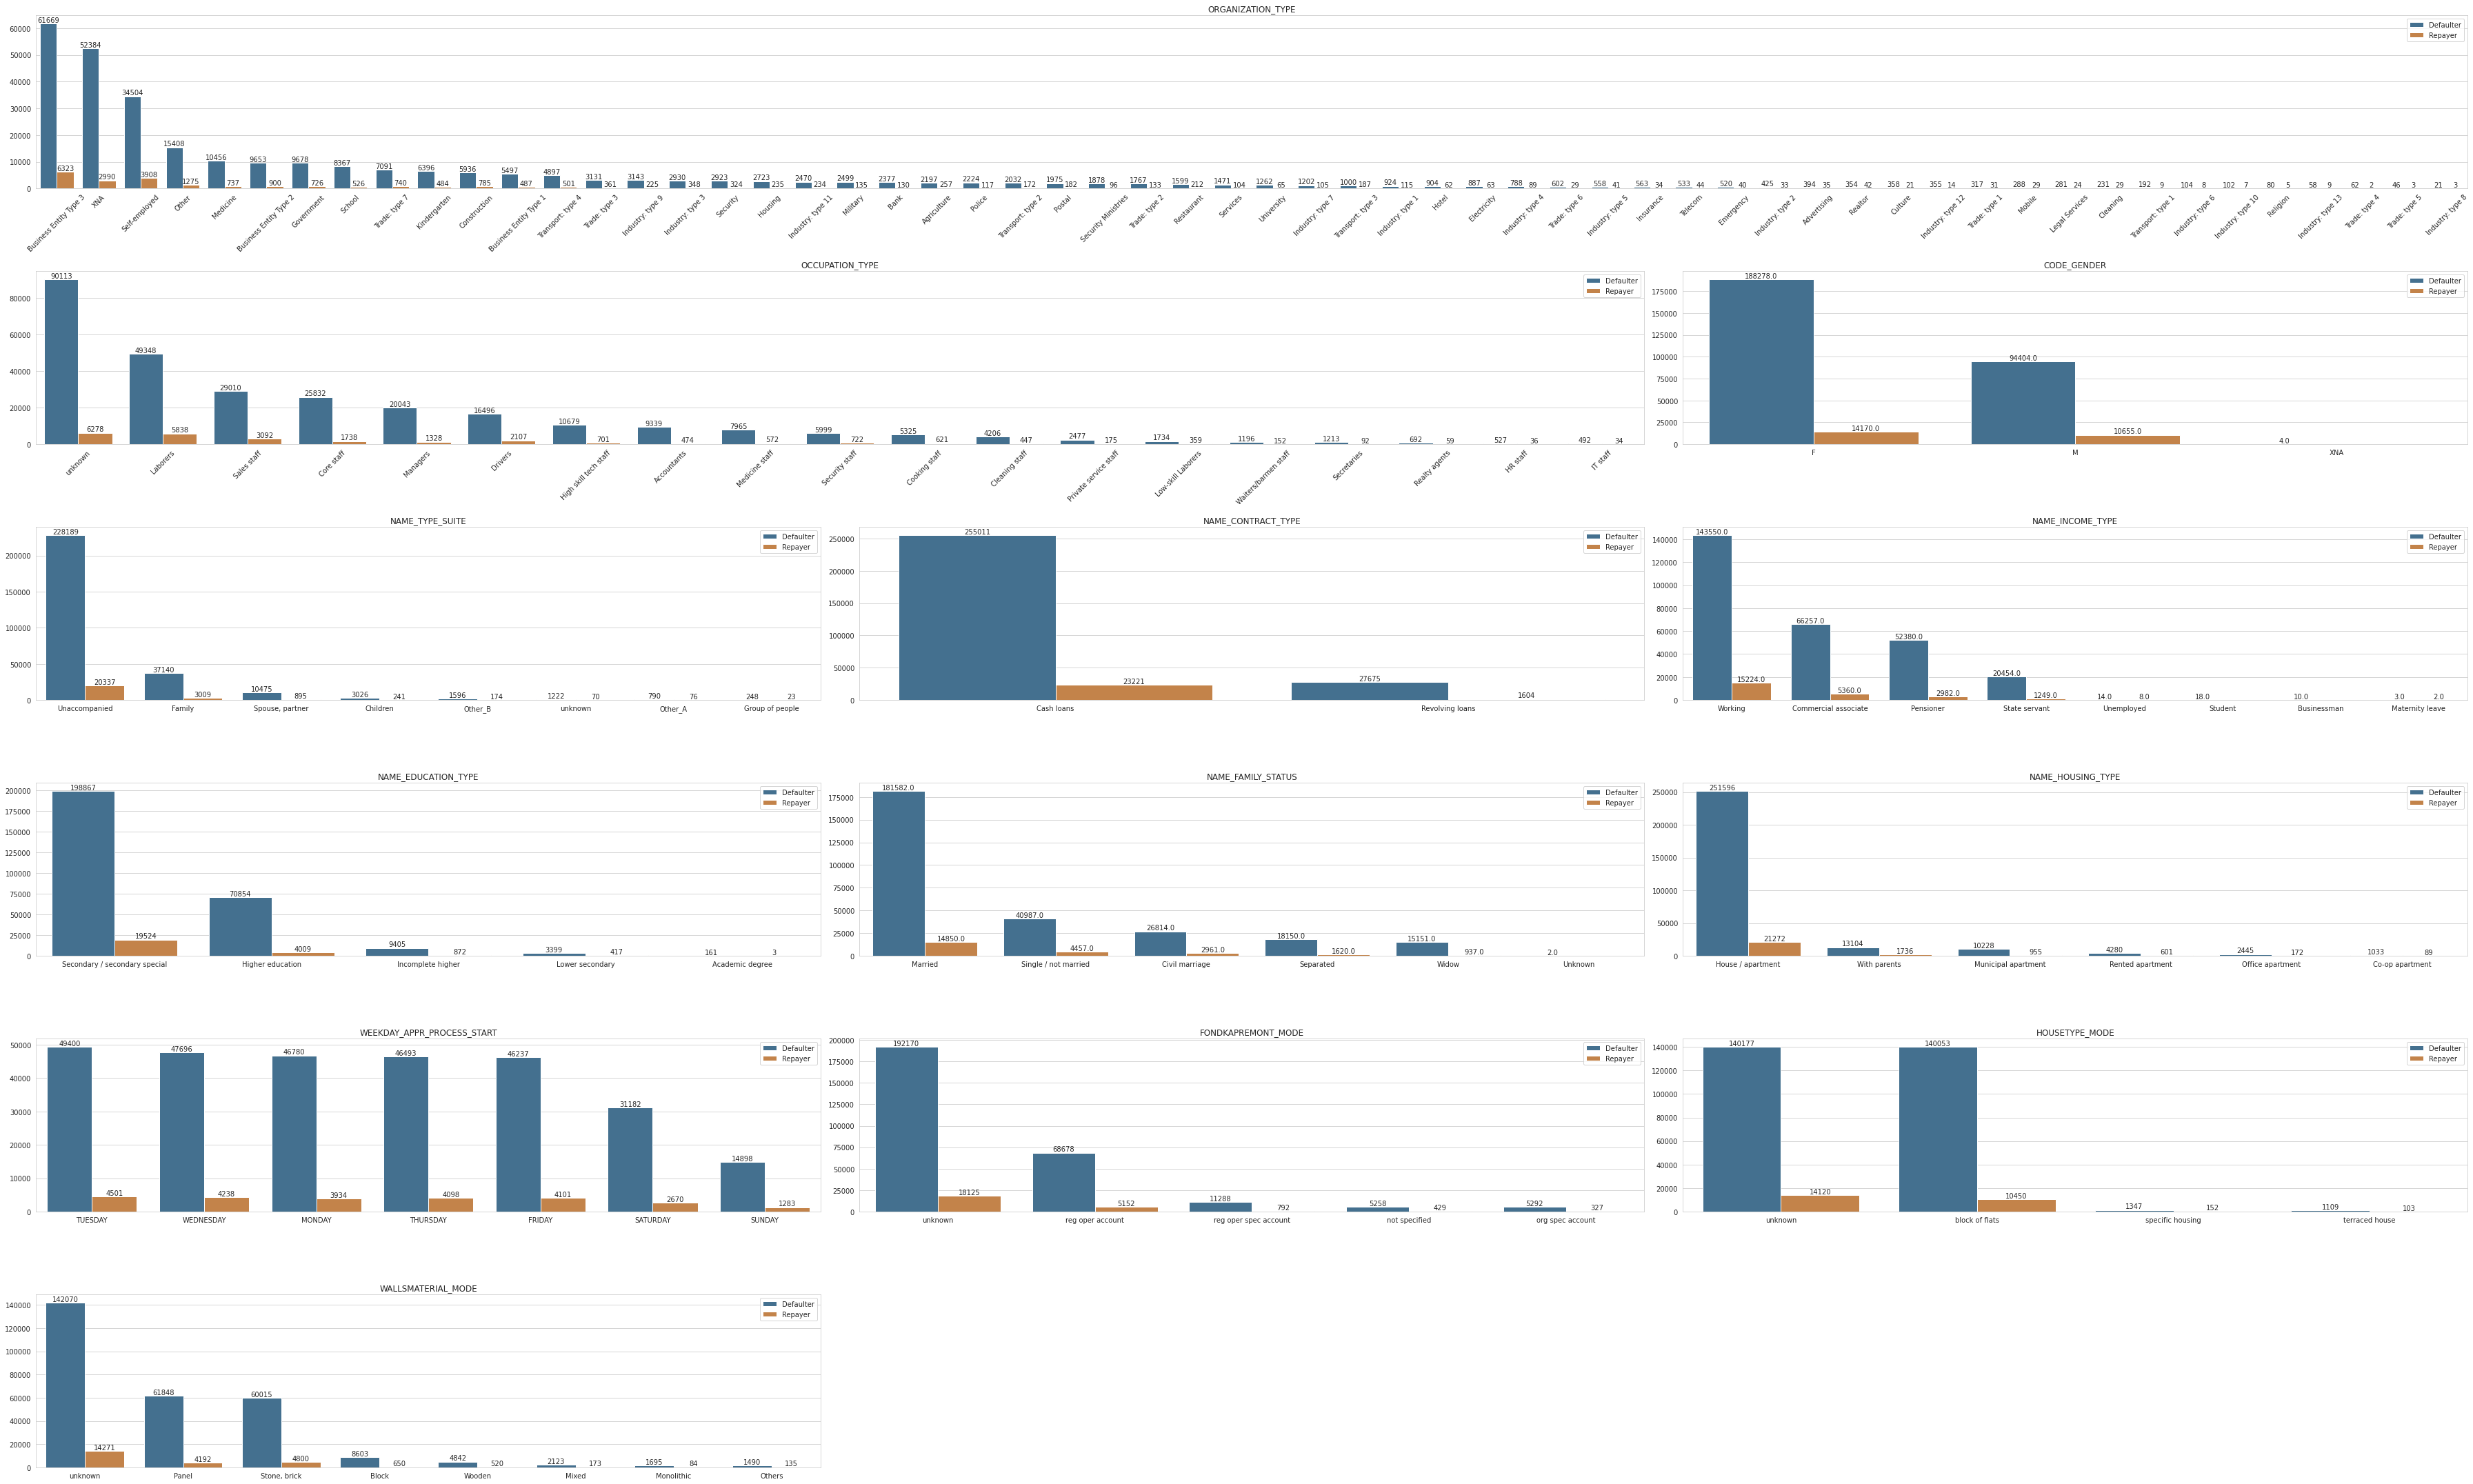

In [17]:
fig = plt.figure(figsize=(50, 30), constrained_layout=False)
gspecs = fig.add_gridspec(nrows=6, ncols=3)

grids_subplots = {
    "ORGANIZATION_TYPE": gspecs[0, :],
    "OCCUPATION_TYPE": gspecs[1, 0:2],
    "CODE_GENDER": gspecs[1, 2],
    "NAME_TYPE_SUITE": gspecs[2, 0],
    "NAME_CONTRACT_TYPE": gspecs[2, 1],
    "NAME_INCOME_TYPE": gspecs[2, 2],
    "NAME_EDUCATION_TYPE": gspecs[3, 0],
    "NAME_FAMILY_STATUS": gspecs[3, 1],
    "NAME_HOUSING_TYPE": gspecs[3, 2],
    "WEEKDAY_APPR_PROCESS_START": gspecs[4, 0],
    "FONDKAPREMONT_MODE": gspecs[4, 1],
    "HOUSETYPE_MODE": gspecs[4, 2],
    "WALLSMATERIAL_MODE": gspecs[5, 0]
}

for col, subplot in grids_subplots.items():

    ax = fig.add_subplot(subplot)

    sns.countplot(data=df, x=col, hue="TARGET", ax=ax, saturation=0.5, order=df[col].value_counts().index)
    ax.legend(labels=["Defaulter", "Repayer"], loc="upper right")

    if col == "ORGANIZATION_TYPE" or col == "OCCUPATION_TYPE":
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)


    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()

        ax.annotate(s=height,
                    xy=(p.get_x() +  width / 2.0, height),
                    ha="center",
                    va="bottom")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title(col)

fig.tight_layout()

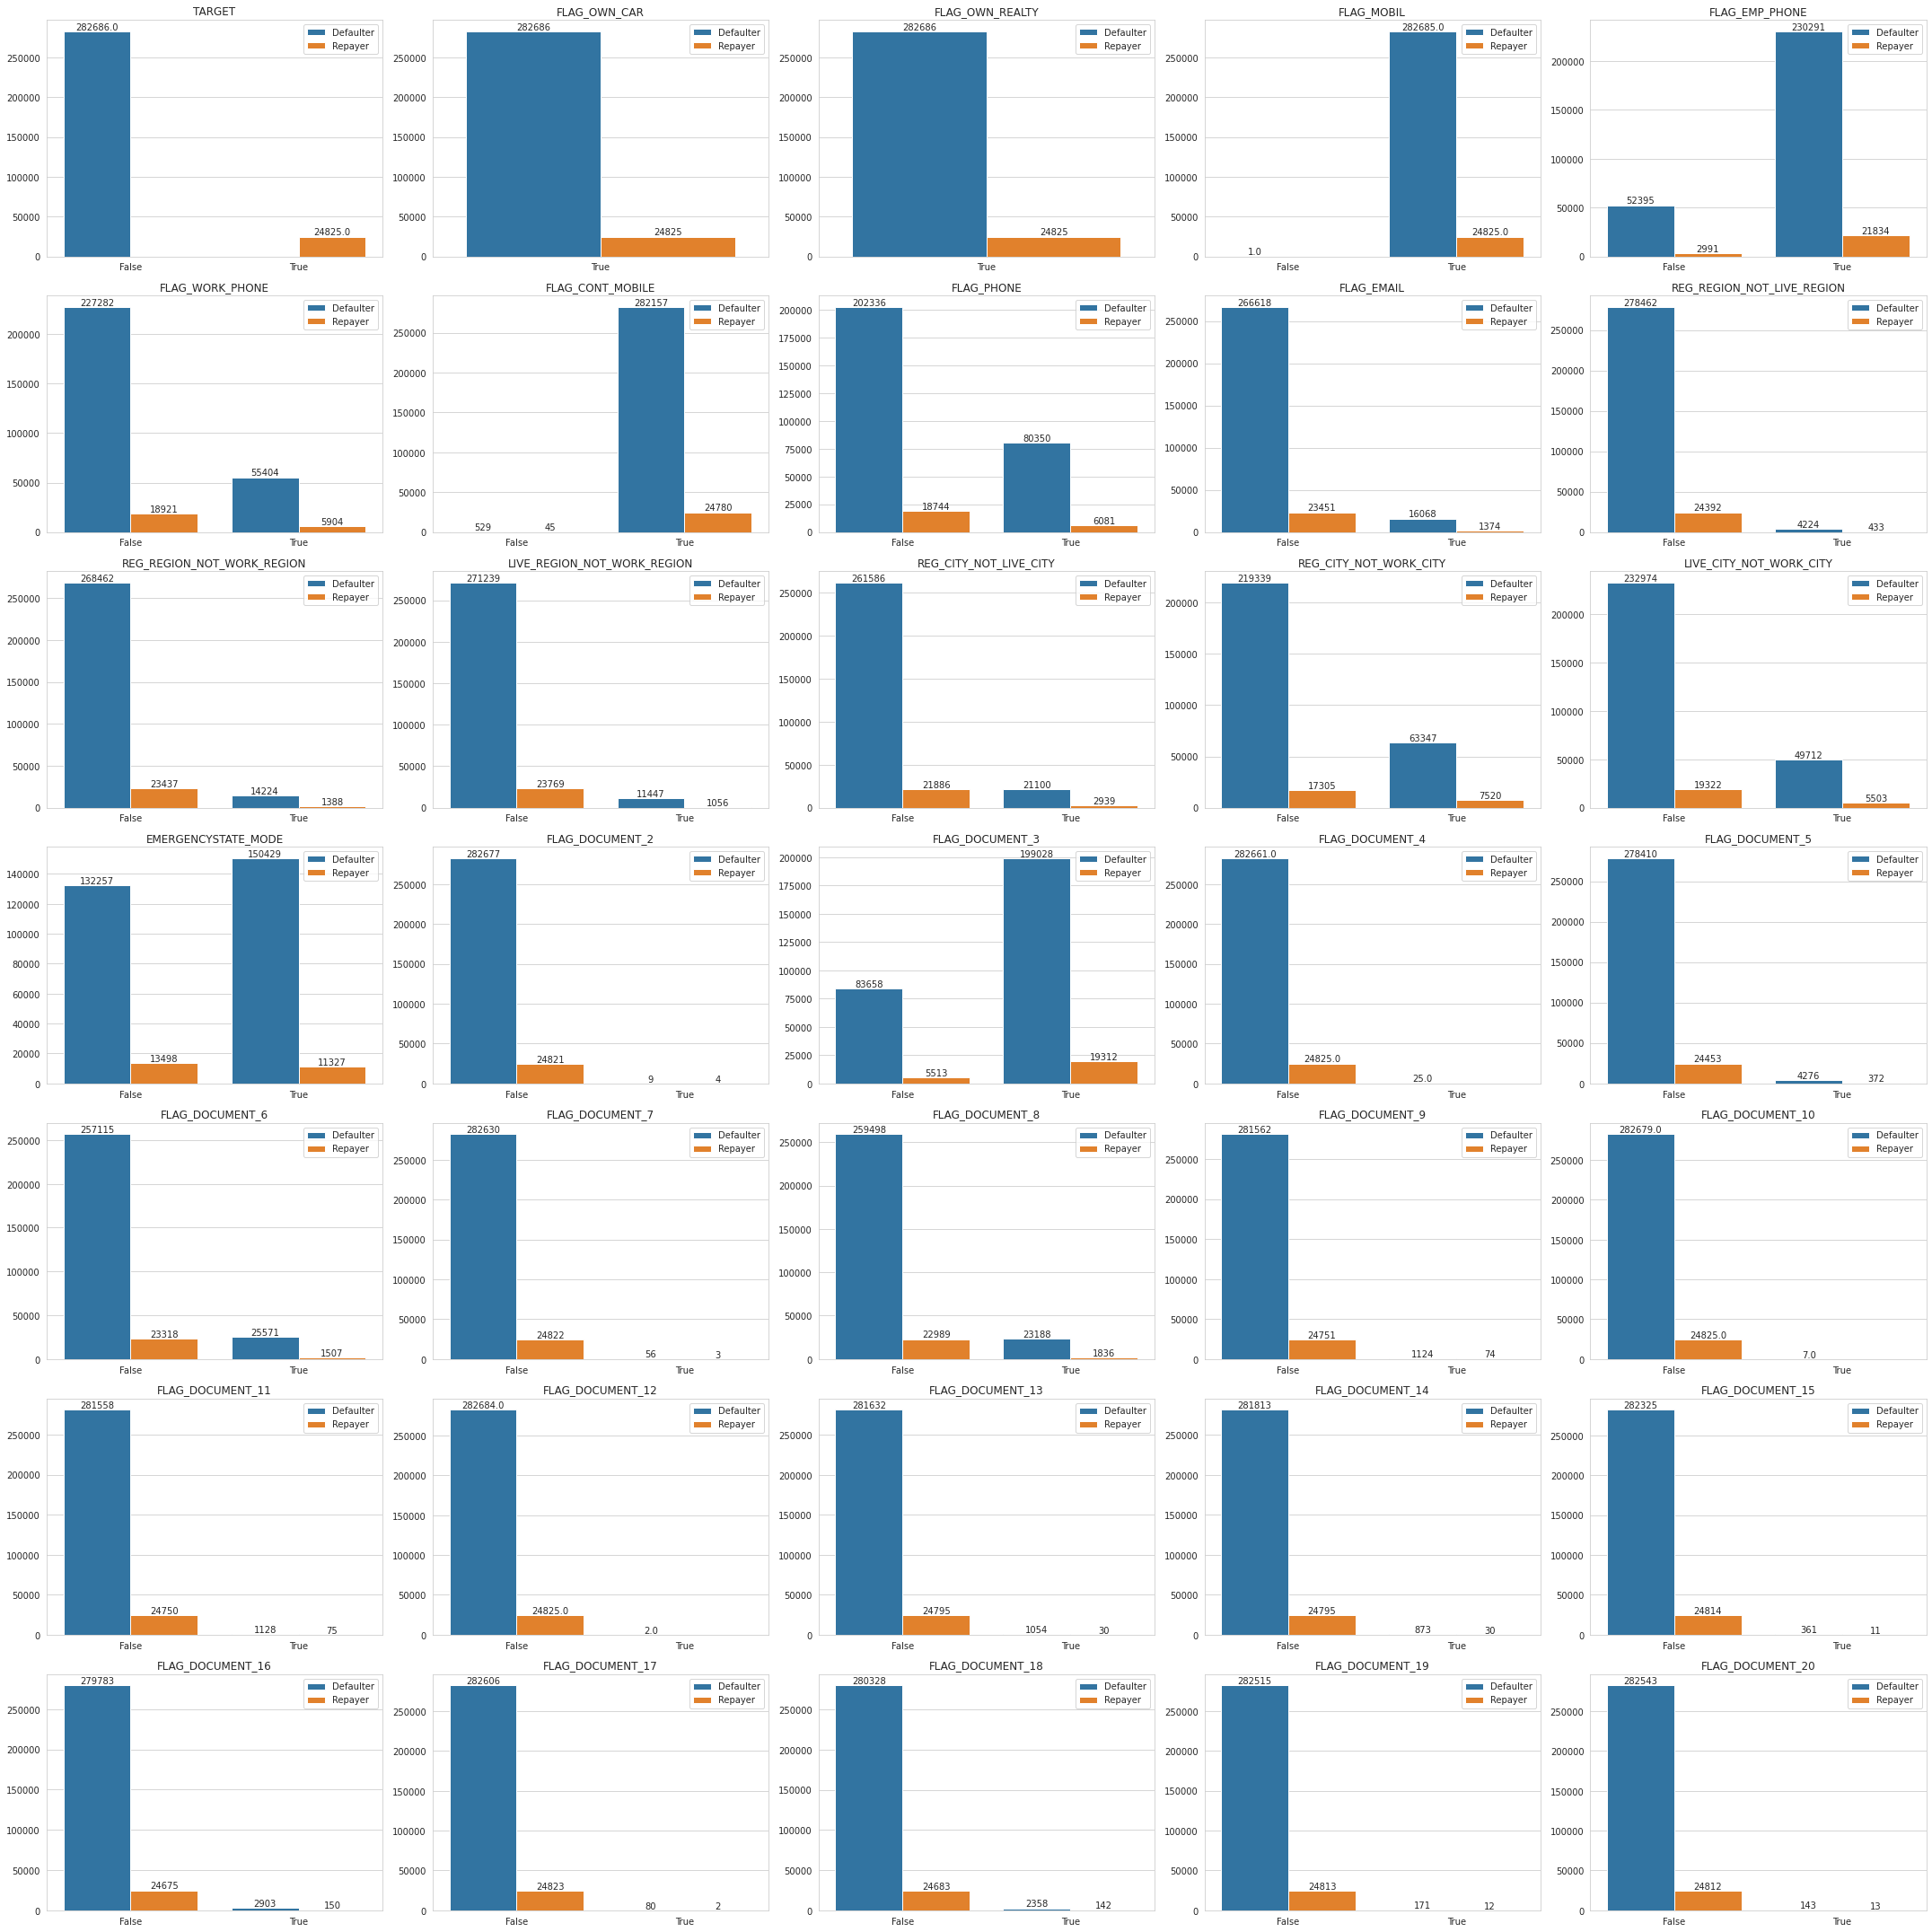

In [18]:
fig, axs = plt.subplots(figsize=(30, 30), ncols=5, nrows=7)

for col, ax in zip(booleans_cols, axs.flatten()):
    sns.countplot(data=df, x=col, hue="TARGET", ax=ax)
    ax.legend(labels=["Defaulter", "Repayer"], loc="upper right")


    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()

        ax.annotate(s=height,
                    xy=(p.get_x() +  width / 2.0, height),
                    ha="center",
                    va="bottom")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title(col)
    
fig.tight_layout()

## Drop columns with almost one value

In [19]:
cols_with_no_variant = []

for col in df.drop(columns=["TARGET"]).columns:
    value, percent = (df[col].value_counts() / df.shape[0]).reset_index().values[0]
    print(f"{col:<30}: {value:<30} => {percent * 100.0:.2f}")
    if percent > 0.95:
        cols_with_no_variant.append(col)

NAME_CONTRACT_TYPE            : Cash loans                     => 90.48
CODE_GENDER                   : F                              => 65.83
FLAG_OWN_CAR                  : 1                              => 100.00
FLAG_OWN_REALTY               : 1                              => 100.00
CNT_CHILDREN                  : 0.0                            => 70.04
AMT_INCOME_TOTAL              : 135000.0                       => 11.63
AMT_CREDIT                    : 450000.0                       => 3.16
AMT_ANNUITY                   : 9000.0                         => 2.08
AMT_GOODS_PRICE               : 450000.0                       => 8.46
NAME_TYPE_SUITE               : Unaccompanied                  => 80.82
NAME_INCOME_TYPE              : Working                        => 51.63
NAME_EDUCATION_TYPE           : Secondary / secondary special  => 71.02
NAME_FAMILY_STATUS            : Married                        => 63.88
NAME_HOUSING_TYPE             : House / apartment              =>

In [20]:
cols_with_no_variant

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'REG_REGION_NOT_LIVE_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [21]:
df.drop(columns=cols_with_no_variant, inplace=True)

## Dealing with NaN in numerical columns

In [22]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
 

In [23]:
df[numerical_cols].isna().sum() / df.shape[0] * 100

CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
CNT_FAM_MEMBERS                  0.000650
REGION_RATING_CLIENT             0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
HOUR_APPR_PROCESS_START          0.000000
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53

In [24]:
pd.options.display.float_format = "{:,.2f}".format
df[numerical_cols].agg(["min", "max", "mean", "median", "std"]).T

,min,max,mean,median,std
CNT_CHILDREN,0.00,19.00,0.42,0.00,0.72
AMT_INCOME_TOTAL,"25,650.00","117,000,000.00","168,797.92","147,150.00","237,123.15"
AMT_CREDIT,"45,000.00","4,050,000.00","599,026.00","513,531.00","402,490.78"
AMT_ANNUITY,"1,615.50","258,025.50","27,108.57","24,903.00","14,493.74"
AMT_GOODS_PRICE,"40,500.00","4,050,000.00","538,396.21","450,000.00","369,446.46"
REGION_POPULATION_RELATIVE,0.00,0.07,0.02,0.02,0.01
DAYS_BIRTH,"-25,229.00","-7,489.00","-16,037.00","-15,750.00","4,363.99"
DAYS_EMPLOYED,"-17,912.00","365,243.00","63,815.05","-1,213.00","141,275.77"
DAYS_REGISTRATION,"-24,672.00",0.00,"-4,986.12","-4,504.00","3,522.89"
DAYS_ID_PUBLISH,"-7,197.00",0.00,"-2,994.20","-3,254.00","1,509.45"


In [25]:
cols_with_negative_dates = ["DAYS_ID_PUBLISH", "DAYS_REGISTRATION", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_LAST_PHONE_CHANGE"]

In [26]:
df[cols_with_negative_dates] = df[cols_with_negative_dates].applymap(np.abs)
df[cols_with_negative_dates]

,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,,,,,
100002,2120,"3,648.00",9461,637,"1,134.00"
100003,291,"1,186.00",16765,1188,828.00
100004,2531,"4,260.00",19046,225,815.00
100006,2437,"9,833.00",19005,3039,617.00
100007,3458,"4,311.00",19932,3038,"1,106.00"
...,...,...,...,...,...
456251,1982,"8,456.00",9327,236,273.00
456252,4090,"4,388.00",20775,365243,0.00
456253,5150,"6,737.00",14966,7921,"1,909.00"


In [27]:
df[[x.replace("DAYS", "YEARS") for x in cols_with_negative_dates]] = df[cols_with_negative_dates] / 365.0 
df.drop(columns=cols_with_negative_dates, inplace=True)
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_ID_PUBLISH,YEARS_REGISTRATION,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,True,Cash loans,M,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,nan,True,False,True,False,Laborers,1.00,2,2,WEDNESDAY,10,False,False,False,False,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",True,2.00,2.00,2.00,2.00,True,False,False,0.00,0.00,0.00,0.00,0.00,1.00,5.81,9.99,25.92,1.75,3.11
100003,False,Cash loans,F,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,nan,True,False,True,False,Core staff,2.00,1,1,MONDAY,11,False,False,False,False,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,True,1.00,0.00,1.00,0.00,True,False,False,0.00,0.00,0.00,0.00,0.00,0.00,0.80,3.25,45.93,3.25,2.27
100004,False,Revolving loans,M,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,26.00,True,True,True,False,Laborers,1.00,2,2,MONDAY,9,False,False,False,False,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,unknown,nan,unknown,False,0.00,0.00,0.00,0.00,False,False,False,0.00,0.00,0.00,0.00,0.00,0.00,6.93,11.67,52.18,0.62,2.23
100006,False,Cash loans,F,0,"135,000.00","312,682.50","29,686.50","297,000.00",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,nan,True,False,False,False,Laborers,2.00,2,2,WEDNESDAY,17,False,False,False,False,Busin

In [28]:
money_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

In [29]:
df[money_cols] = df[money_cols].applymap(np.log)
df[money_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
SK_ID_CURR,,,,
100002,12.22,12.92,10.11,12.77
100003,12.51,14.07,10.48,13.94
100004,11.12,11.81,8.82,11.81
100006,11.81,12.65,10.30,12.60
100007,11.71,13.15,9.99,13.15
...,...,...,...,...
456251,11.97,12.45,10.22,12.32
456252,11.18,12.50,9.39,12.32
456253,11.94,13.43,10.31,13.28


In [30]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(0.0)
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_ID_PUBLISH,YEARS_REGISTRATION,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,True,Cash loans,M,0,12.22,12.92,10.11,12.77,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,0.00,True,False,True,False,Laborers,1.00,2,2,WEDNESDAY,10,False,False,False,False,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",True,2.00,2.00,2.00,2.00,True,False,False,0.00,0.00,0.00,0.00,0.00,1.00,5.81,9.99,25.92,1.75,3.11
100003,False,Cash loans,F,0,12.51,14.07,10.48,13.94,Family,State servant,Higher education,Married,House / apartment,0.00,0.00,True,False,True,False,Core staff,2.00,1,1,MONDAY,11,False,False,False,False,School,0.31,0.62,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,True,1.00,0.00,1.00,0.00,True,False,False,0.00,0.00,0.00,0.00,0.00,0.00,0.80,3.25,45.93,3.25,2.27
100004,False,Revolving loans,M,0,11.12,11.81,8.82,11.81,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,26.00,True,True,True,False,Laborers,1.00,2,2,MONDAY,9,False,False,False,False,Government,0.00,0.56,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,unknown,unknown,0.00,unknown,False,0.00,0.00,0.00,0.00,False,False,False,0.00,0.00,0.00,0.00,0.00,0.00,6.93,11.67,52.18,0.62,2.23
100006,False,Cash loans,F,0,11.81,12.65,10.30,12.60,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,0.00,True,False,False,False,Laborers,2.00,2,2,WEDNESDAY,17,False,False,False,False,Business Entity Type 3,0.00,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [31]:
df.isna().sum()

TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
OWN_CAR_AGE                     0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_WORK_REGION      0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_T

# Data Exploration

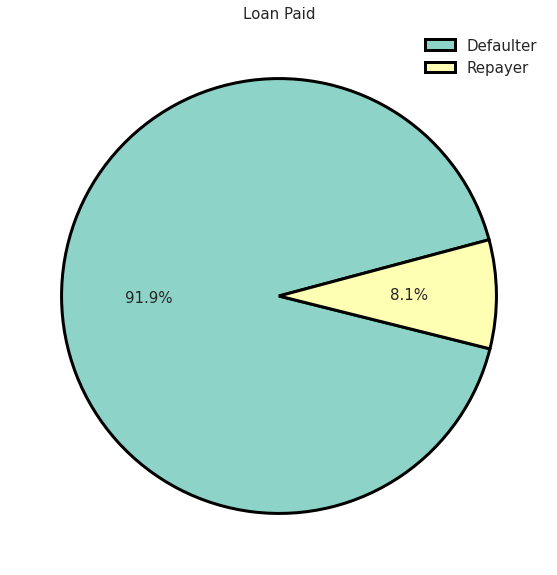

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap("Set3")

ax.pie(
    x=df["TARGET"].value_counts(),
    autopct="%.1f%%",
    startangle=15,
    colors=[cmap(i) for i in range(100)],
    wedgeprops={"linewidth": 3, "edgecolor": "k"}, 
    textprops={"fontsize": 15})

ax.legend(["Defaulter", "Repayer"], 
          loc='best', 
          fontsize=15,
          frameon=False)
          
ax.set_title("Loan Paid", loc="center", fontdict={"fontsize": 15})


plt.show()

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
enc = OrdinalEncoder()
df[categorical_cols] = pd.DataFrame(data=enc.fit_transform(df[categorical_cols]),
                                    columns=categorical_cols,
                                    index=df.index)
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_ID_PUBLISH,YEARS_REGISTRATION,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,True,0.00,1.00,0,12.22,12.92,10.11,12.77,6.00,7.00,4.00,3.00,1.00,0.02,0.00,True,False,True,False,8.00,1.00,2,2,6.00,10,False,False,False,False,5.00,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,2.00,0.00,0.01,5.00,True,2.00,2.00,2.00,2.00,True,False,False,0.00,0.00,0.00,0.00,0.00,1.00,5.81,9.99,25.92,1.75,3.11
100003,False,0.00,0.00,0,12.51,14.07,10.48,13.94,1.00,4.00,1.00,1.00,1.00,0.00,0.00,True,False,True,False,3.00,2.00,1,1,1.00,11,False,False,False,False,39.00,0.31,0.62,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,2.00,0.00,0.07,0.00,True,1.00,0.00,1.00,0.00,True,False,False,0.00,0.00,0.00,0.00,0.00,0.00,0.80,3.25,45.93,3.25,2.27
100004,False,1.00,1.00,0,11.12,11.81,8.82,11.81,6.00,7.00,4.00,3.00,1.00,0.01,26.00,True,True,True,False,8.00,1.00,2,2,1.00,9,False,False,False,False,11.00,0.00,0.56,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.00,0.00,7.00,False,0.00,0.00,0.00,0.00,False,False,False,0.00,0.00,0.00,0.00,0.00,0.00,6.93,11.67,52.18,0.62,2.23
100006,False,0.00,0.00,0,11.81,12.65,10.30,12.60,6.00,7.00,4.00,0.00,1.00,0.01,0.00,True,False,False,False,8.00,2.00,2,2,6.00,17,False,False,False,False,5.00,0.00,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,3.00,0.00,7.00,False,2.00,0.00,2.00,0.00,True,False,False,0.00,0.00,0.00,0.00,0.00,0.00,6.68,26.94,52.07,8.33,1.69
100007,False,0.00,1.00,0,11.71,13.15,9.99,13.15,6.00,7.00,4.00,3.00,1.00,0.03,0.00,Tru

# Balancing dataset

In [35]:
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

In [36]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [38]:
rs = RandomUnderSampler()

In [39]:
X_resampled, y_resampled = rs.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [40]:
X_resampled.shape, y_resampled.shape

((49650, 97), (49650,))

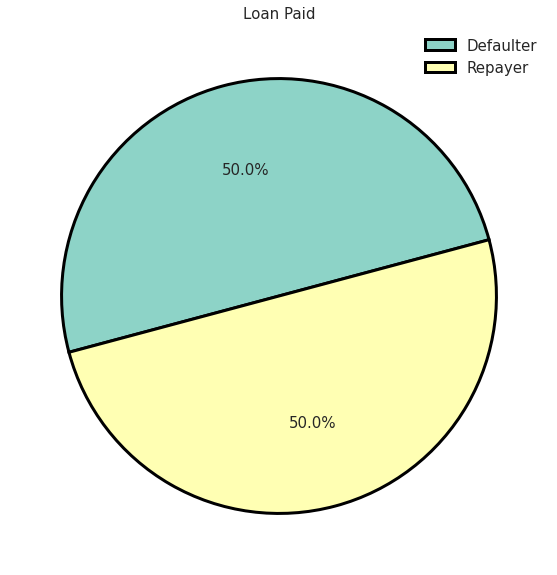

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap("Set3")

value, counts = np.unique(y_resampled, return_counts=True)

ax.pie(
    x=counts,
    autopct="%.1f%%",
    startangle=15,
    colors=[cmap(i) for i in range(100)],
    wedgeprops={"linewidth": 3, "edgecolor": "k"}, 
    textprops={"fontsize": 15})

ax.legend(["Defaulter", "Repayer"], 
          loc='best', 
          fontsize=15,
          frameon=False)
          
ax.set_title("Loan Paid", loc="center", fontdict={"fontsize": 15})


plt.show()

# Model Prediction

In [94]:
from sklearn.preprocessing import StandardScaler

In [96]:
X_resampled_scaled = StandardScaler().fit_transform(X_resampled)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled.astype("float32"), y_resampled.astype("float32"), test_size=0.3)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import AUC, Accuracy, Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [101]:
def create_model():
    model = Sequential()

    model.add(Dense(512, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(250, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(128, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(64, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))

    model.add(Dense(16, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))

    model.add(Dense(8, input_dim=X.shape[1], kernel_initializer="he_normal", activation="relu"))

    model.add(Dense(1, input_dim=X.shape[1], kernel_initializer="he_normal", activation="sigmoid"))

    model.compile(optimizer="sgd",
                  loss="binary_crossentropy",
                  metrics=[AUC(name="auc"),
                           AUC(name='prc', curve='PR'),
                           Recall(name="recall"),
                           Precision(name="precision"),
                           Accuracy(name="accuracy"),
                           TruePositives(name="TP"),
                           TrueNegatives(name="TN"),
                           FalsePositives(name="FP"),
                           FalseNegatives(name="FN")]
                  )
    
    return model

In [108]:
model = create_model()
history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=100,
        verbose=2,
        validation_data=(X_test, y_test))

Epoch 1/200
348/348 - 7s - loss: 0.6979 - auc: 0.5304 - prc: 0.5285 - recall: 0.5405 - precision: 0.5249 - accuracy: 0.0000e+00 - TP: 9433.0000 - TN: 8766.0000 - FP: 8537.0000 - FN: 8019.0000 - val_loss: 0.6874 - val_auc: 0.5538 - val_prc: 0.5607 - val_recall: 0.2874 - val_precision: 0.5937 - val_accuracy: 0.0000e+00 - val_TP: 2119.0000 - val_TN: 6072.0000 - val_FP: 1450.0000 - val_FN: 5254.0000
Epoch 2/200
348/348 - 4s - loss: 0.6889 - auc: 0.5501 - prc: 0.5521 - recall: 0.4396 - precision: 0.5555 - accuracy: 0.0000e+00 - TP: 7672.0000 - TN: 11164.0000 - FP: 6139.0000 - FN: 9780.0000 - val_loss: 0.6816 - val_auc: 0.5811 - val_prc: 0.5917 - val_recall: 0.3454 - val_precision: 0.6220 - val_accuracy: 0.0000e+00 - val_TP: 2547.0000 - val_TN: 5974.0000 - val_FP: 1548.0000 - val_FN: 4826.0000
Epoch 3/200
348/348 - 4s - loss: 0.6834 - auc: 0.5742 - prc: 0.5802 - recall: 0.4718 - precision: 0.5754 - accuracy: 0.0000e+00 - TP: 8234.0000 - TN: 11228.0000 - FP: 6075.0000 - FN: 9218.0000 - val_lo

In [109]:
history.history.keys()

dict_keys(['loss', 'auc', 'prc', 'recall', 'precision', 'accuracy', 'TP', 'TN', 'FP', 'FN', 'val_loss', 'val_auc', 'val_prc', 'val_recall', 'val_precision', 'val_accuracy', 'val_TP', 'val_TN', 'val_FP', 'val_FN'])

In [110]:
def get_sensitivity(tps, fns):
    # Sensitivity = (True Positive)/(True Positive + False Negative)
     return [tp / (tp + fn) for tp, fn in zip(tps, fns)]

def get_specificity(tns, fps):
    # Specificity = (True Negative)/(True Negative + False Positive)
    return [tn / (tn + fp) for tn, fp in zip(tns, fps)]

In [111]:
sensitivity = get_sensitivity(history.history["TP"], history.history["FN"])
val_sensitivity = get_sensitivity(history.history["val_TP"], history.history["val_FN"])

specificity = get_specificity(history.history["TN"], history.history["FP"])
val_specificity = get_specificity(history.history["val_TN"], history.history["val_FP"])

In [112]:
metrics = {
    "loss": [history.history["loss"], history.history["val_loss"]],
    "auc": [history.history["auc"], history.history["val_auc"]],
    "prc": [history.history["prc"], history.history["val_prc"]],
    "recall": [history.history["recall"], history.history["val_recall"]],
    "precision": [history.history["precision"], history.history["val_precision"]],
    "accuracy": [history.history["accuracy"], history.history["val_accuracy"]],
    "sensitivity": [sensitivity, val_sensitivity],
    "specificity": [specificity, val_specificity]
}


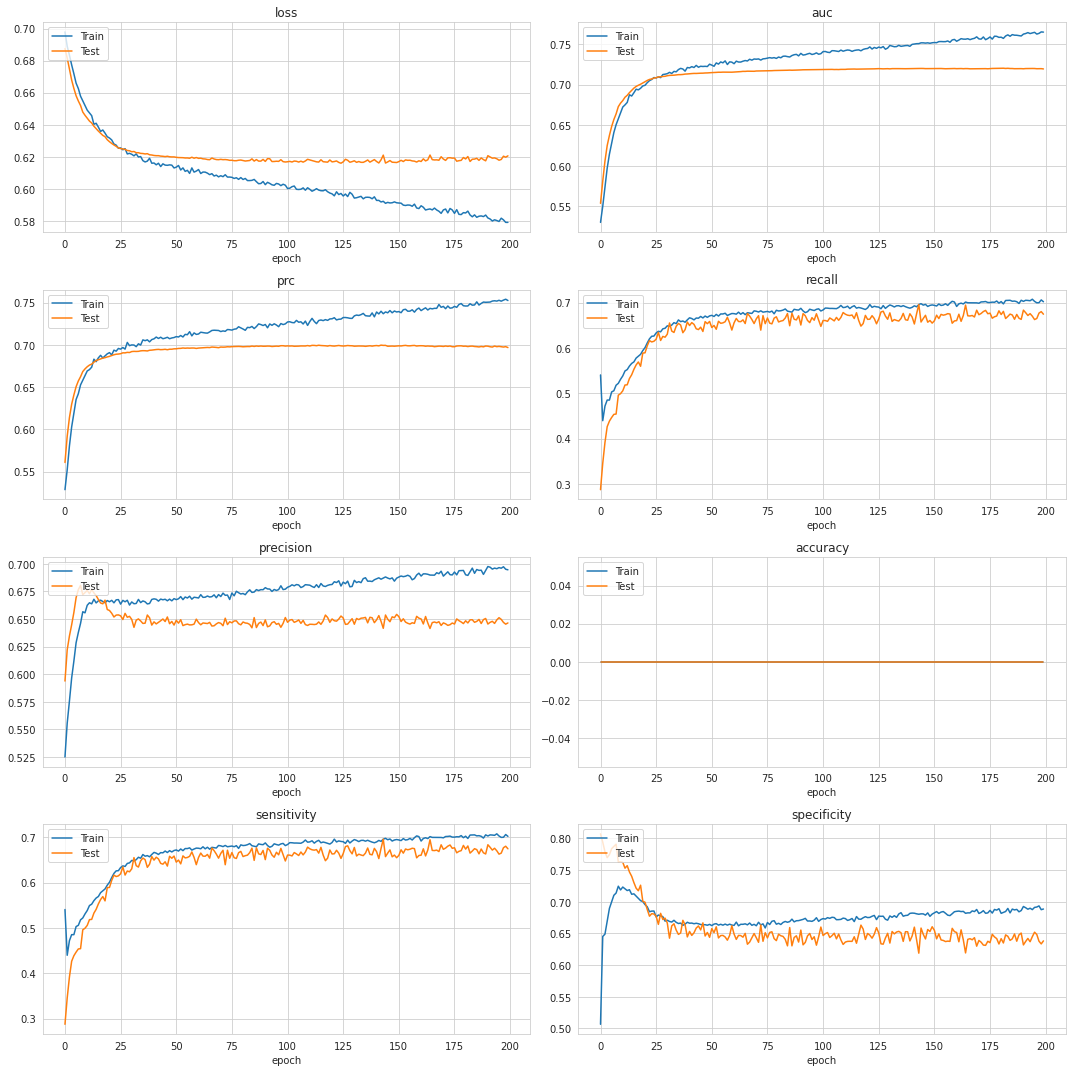

In [113]:
fig, axs = plt.subplots(figsize=(15, 15), ncols=2, nrows=4)

for metric, ax in zip(metrics.items(), axs.flatten()):
    name = metric[0]

    train = metric[1][0]
    test = metric[1][1]

    ax.plot(train)
    ax.plot(test)

    ax.set_title(name)

    ax.set_xlabel("epoch")
    ax.legend(['Train', 'Test'], loc='upper left')

fig.tight_layout()
fig.show()